In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
student_dataset = pd.read_csv(r"StudentsPerformance.csv")
print("Number of Examples and Features:", student_dataset.shape)
print("\n First 5 data\n--------------------")
student_dataset.head()

Number of Examples and Features: (1000, 8)

 First 5 data
--------------------


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
print("\n Last 5 data\n--------------------")
student_dataset.tail()


 Last 5 data
--------------------


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [4]:
print("Information about dataset")
print(student_dataset.info())

Information about dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [5]:
student_dataset['Average'] = (student_dataset['math score'] + 
                              student_dataset['reading score'] + 
                              student_dataset['writing score']) / 3

In [6]:
#Assigning Grades(in CBSE pattern) according to percentage

def assign_grade(percentage):
    if percentage >= 81 and percentage <= 100:
        return 'A'
    elif percentage >= 61 and percentage < 81:
        return 'B'
    elif percentage >= 41 and percentage < 61:
        return 'C'
    elif percentage >= 33 and percentage < 41:
        return 'D'
    elif percentage >= 0 and percentage < 33:
        return 'E'

In [7]:
student_dataset['grade'] = student_dataset['Average'].apply(assign_grade)
student_dataset.drop(['math score', 'reading score', 'writing score', 'Average'], axis = 1, inplace = True)

In [8]:
student_dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,grade
0,female,group B,bachelor's degree,standard,none,B
1,female,group C,some college,standard,completed,A
2,female,group B,master's degree,standard,none,A
3,male,group A,associate's degree,free/reduced,none,C
4,male,group C,some college,standard,none,B


In [9]:
student_dataset.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,grade
count,1000,1000,1000,1000,1000,1000
unique,2,5,6,2,2,5
top,female,group C,some college,standard,none,B
freq,518,319,226,645,642,513


In [10]:
start = "\033[1m"
end = "\033[0;0m"

print(start + "Unique gender: " + end, np.sort(student_dataset['gender'].unique()))

print(start + "\nUnique race/ethnicity: " + end, np.sort(student_dataset['race/ethnicity'].unique()))

print(start + "\nUnique parental level of education: " + end, np.sort(student_dataset['parental level of education'].unique()))

print(start + "\nUnique lunch: " + end, np.sort(student_dataset['lunch'].unique()))

print(start + "\nUnique test preparation course: " + end, np.sort(student_dataset['test preparation course'].unique()))

print(start + "\nUnique grades "+ "\033[91m (Class Labels): " + end, np.sort(student_dataset['grade'].unique()))

Unique gender:  ['female' 'male']

Unique race/ethnicity:  ['group A' 'group B' 'group C' 'group D' 'group E']

Unique parental level of education:  ["associate's degree" "bachelor's degree" 'high school' "master's degree"
 'some college' 'some high school']

Unique lunch:  ['free/reduced' 'standard']

Unique test preparation course:  ['completed' 'none']

Unique grades  (Class Labels):  ['A' 'B' 'C' 'D' 'E']


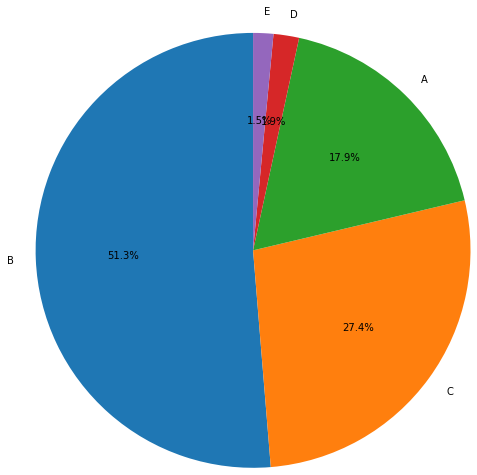

In [11]:
temp = student_dataset['grade'].value_counts().plot.pie(autopct = "%1.1f%%", radius = 2.5, startangle = 90)
temp.set_ylabel('')
plt.show()

In [12]:
total_examples = student_dataset.shape[0]
def calculate_probability(feature):
    feature_count = dict(student_dataset[feature].value_counts())
    result = dict()
    for key, value in feature_count.items():
        result[key] = value/total_examples
    return result

In [13]:
probability_list = student_dataset.columns.tolist()
for i, feature in enumerate(student_dataset.columns.tolist()):
    result = dict()
    result = calculate_probability(feature)
    probability_list[i] = result

In [14]:
gender_probability, race_probability , parental_level_of_education_probability, lunch_probability, test_preparation_course_probability, grade_probability= probability_list

print(start + "\nGrades Probability "+ "\033[91m (Class Labels): " + end, json.dumps(grade_probability, sort_keys=True, indent=4))

print(start + "\nGender Probability: " + end, json.dumps(gender_probability, sort_keys=True, indent=4))

print(start + "\nRace/ethnicity Probability: " + end, json.dumps(race_probability, sort_keys=True, indent=4))

print(start + "\nParental level of education Probability: " + end, json.dumps(parental_level_of_education_probability, sort_keys=True, indent=4))

print(start + "\nLunch Probability: " + end, json.dumps(lunch_probability, sort_keys=True, indent=4))

print(start + "\nTest preparation Probability: " + end, json.dumps(test_preparation_course_probability, sort_keys=True, indent=4))


Grades Probability  (Class Labels):  {
    "A": 0.179,
    "B": 0.513,
    "C": 0.274,
    "D": 0.019,
    "E": 0.015
}

Gender Probability:  {
    "female": 0.518,
    "male": 0.482
}

Race/ethnicity Probability:  {
    "group A": 0.089,
    "group B": 0.19,
    "group C": 0.319,
    "group D": 0.262,
    "group E": 0.14
}

Parental level of education Probability:  {
    "associate's degree": 0.222,
    "bachelor's degree": 0.118,
    "high school": 0.196,
    "master's degree": 0.059,
    "some college": 0.226,
    "some high school": 0.179
}

Lunch Probability:  {
    "free/reduced": 0.355,
    "standard": 0.645
}

Test preparation Probability:  {
    "completed": 0.358,
    "none": 0.642
}


In [15]:
def dependent_probability(feature):
    result = dict()
    for unique_value in student_dataset[feature].unique().tolist():
        result[unique_value] = dict( (student_dataset[student_dataset[feature] == unique_value].grade.value_counts())
                                    / (student_dataset['grade'].value_counts()))
    return(result)

In [16]:
dependent_probability_list = student_dataset.columns.tolist()
dependent_probability_list.remove('grade')
for i, feature in enumerate(student_dataset.columns.tolist()):
    if feature != 'grade':
        result = dict()
        result = dependent_probability(feature)
        dependent_probability_list[i] = result
        
# print(dependent_probability_list)

In [17]:
def remove_null(temp_dict):
    for key, value in temp_dict.items():
        for k, v in value.items():
            if np.isnan(value[k]):
                value[k] = 0
    return temp_dict

In [18]:
gender_given_grade, race_given_grade , parental_level_of_education_given_grade, lunch_given_grade, test_preparation_course_given_grade = dependent_probability_list

test_preparation_course_given_grade = remove_null(test_preparation_course_given_grade)
parental_level_of_education_given_grade = remove_null(parental_level_of_education_given_grade)

print(start + "\nP(Gender/grade): " + end, json.dumps(gender_given_grade, sort_keys=True, indent=4))

print(start + "\nP(Race/grade): " + end, json.dumps(race_given_grade, sort_keys=True, indent=4))

print(start + "\nP(Parental level of education/grade): " + end, json.dumps(parental_level_of_education_given_grade, sort_keys=True, indent=4))

print(start + "\nP(Lunch/grade): " + end, json.dumps(lunch_given_grade, sort_keys=True, indent=4))

print(start + "\nP(Test preparation/grade): " + end, json.dumps(test_preparation_course_given_grade, sort_keys=True, indent=4))


P(Gender/grade):  {
    "female": {
        "A": 0.6145251396648045,
        "B": 0.5380116959064327,
        "C": 0.41605839416058393,
        "D": 0.47368421052631576,
        "E": 0.6
    },
    "male": {
        "A": 0.3854748603351955,
        "B": 0.4619883040935672,
        "C": 0.583941605839416,
        "D": 0.5263157894736842,
        "E": 0.4
    }
}

P(Race/grade):  {
    "group A": {
        "A": 0.055865921787709494,
        "B": 0.07212475633528265,
        "C": 0.14233576642335766,
        "D": 0.10526315789473684,
        "E": 0.06666666666666667
    },
    "group B": {
        "A": 0.1787709497206704,
        "B": 0.18128654970760233,
        "C": 0.20437956204379562,
        "D": 0.15789473684210525,
        "E": 0.4
    },
    "group C": {
        "A": 0.2849162011173184,
        "B": 0.31968810916179335,
        "C": 0.33941605839416056,
        "D": 0.3157894736842105,
        "E": 0.3333333333333333
    },
    "group D": {
        "A": 0.26256983240223464,
     

In [19]:
def prediction(grade, gender, race, parental_level_of_education, lunch, test_preparation):
    grade_list = student_dataset['grade'].unique().tolist()
    likelihood = (gender_given_grade[gender][grade] * 
                  race_given_grade[race][grade] * 
                  parental_level_of_education_given_grade[parental_level_of_education][grade] *
                  lunch_given_grade[lunch][grade] *
                  test_preparation_course_given_grade[test_preparation][grade])
                  
    prior_knowledge = grade_probability[grade]
    denominator_model_parameters = 0
    for g in grade_list:
        temp = (gender_given_grade[gender][g] * 
                                        race_given_grade[race][grade] * 
                                        parental_level_of_education_given_grade[parental_level_of_education][g] *
                                        lunch_given_grade[lunch][g] *
                                        test_preparation_course_given_grade[test_preparation][g] *
                                        grade_probability[g])
        denominator_model_parameters += temp
        
    final_probability = (likelihood * prior_knowledge) / denominator_model_parameters
    return final_probability

In [20]:
# Grade = input("Enter grade: ")

Gender = input("Enter gender: ")
Race = input("Enter race/ethnicity: ")
Parental_level_of_education = input("Enter Parental level of education: ")
Lunch = input("Enter lunch type: ")
Test_preparation = input("Enter test preparation: ")

final_probability = dict()
for g in np.sort(student_dataset['grade'].unique()):
    final_probability[g] = prediction(g, Gender, Race, Parental_level_of_education, Lunch, Test_preparation)

final_probability

Enter gender: female
Enter race/ethnicity: group A
Enter Parental level of education: associate's degree
Enter lunch type: standard
Enter test preparation: completed


{'A': 0.4152410780701486,
 'B': 0.49193009792607717,
 'C': 0.09221043038947445,
 'D': 0.0006183936142998273,
 'E': 0.0}